T ->  2000
v ->  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


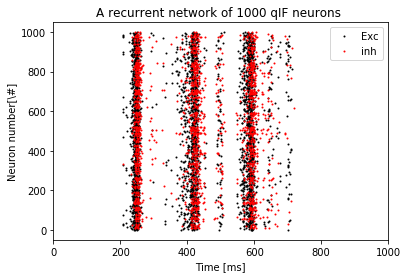

In [2]:
from pylab import *
from math import ceil
from numpy.random import uniform
from scipy.sparse import csr_matrix


# 1) initialize parameters
tmax = 1000
dt = 0.5

#1.1) Neuron / Network pars
n = 1000 # number of neurons
pinh = 0.2 #prob of inh neuron
inh = (uniform(size=n)<pinh) # whether inh.
exc = logical_not(inh)
a = inh.choose(0.02,0.1) # exc = 0.02, inh =0.1
b = 0.2
c = -65
d = inh.choose(8,2) # exc=8, inh = 2
tau_s = 10 # decay of synapses [ms]

#tau_d = 500 #synaptic depression [ms]
#std_u = 0.5 # STP parameter

#NEW recurrent parameter
w = 0.005 # average recurrent weight
pconn= 0.1 # recurrent connection prob
scaleEI = 2 # scale I->E
g_sc = 0.002 # scale of gamma
E = inh.choose(0,-85)
# NEW make weight matrix
W = zeros((n,n))
C = uniform(size = (n, n))
idx = nonzero(C<pconn) # sparse connectivity
W[idx] = gamma(w/g_sc, scale=g_sc, size=idx[0].size)
W[ix_(exc,inh)] *= scaleEI #submat indexing
W = csr_matrix(W) # make row sparse

# 1.2) Input pars
tr = ([int(200/dt), int(700/dt)])
rate_in = 2 #input rate
n_in = 100 # number of inputs
w_in = 0.07 # input weights
pconn_in = 0.1 #input conn prob.
C = uniform(size=(n, n_in))<pconn_in
W_in = C.choose(0, w_in) #  matrix

# 2) reserve memory 
T = ceil(tmax/dt)
print("T -> ",T)
v = zeros((T,n)) # now matrix
print("v -> ", v)
u = zeros((T,n)) # now matrix
v[0] = -70 # set 1st row
u[0] = -14 
s_in = zeros(n_in) 
E_in = zeros(n_in) 
prate = dt*rate_in*1e-3 # abbrev
#h = ones(n_in)
s= zeros(n) # rec synapses

#lastsp = -infty*ones(n_in)


# 3) for_loop over time
for t in arange(T-1):
    # 3.1) get input
    if  t>tr[0] and t<tr[1] :
        # NEW: get input Poisson spikes
        p = (uniform(size = n_in)) < prate;
        
    else:

        p = 0; # no input
     
    # NEW: calculate input current
    s_in = (1 - dt/tau_s)*s_in + p
    i = W_in.dot(s_in*E_in)
    i -= W_in.dot(s_in)*v[t]
    
    #print("v[t] -> ",v[t])
    #NEW: handle all neurons
    fired = v[t]>=35
    
    #print("fired -> ", fired)
    
    #NEW recurrent input
    s = (1 - dt/tau_s)*s +fired
    lsyn = W.dot(s*E) - W.dot(s)*v[t]
    i += lsyn # add to input vector
    
  #  if fired:
        # 3.2) update ODE , simply update all
    dv = (0.04*v[t]+5)*v[t]+140-u[t]
    res = v[t] + (dv+i)*dt
    v[t+1] = v[t] + (dv+i)*dt
    du = a *(b*v[t] - u[t])
    u[t+1] = u[t] + dt*du
  #  else:
    # 3.3) spike !
    v[t][fired] = 35
    v[t+1][fired] = c
    u[t+1][fired] = u[t][fired] +d[fired]
   
  
# 4) plot voltage trace
# NEW: get spikes and plot
tspk, nspk =  nonzero(v == 35)
idx_i = in1d(nspk,nonzero(inh)[0]) # find inh
idx_e = logical_not(idx_i) # all others are exc

figure()
#tvec = arange(0, tmax, dt)
plot(tspk[idx_e]*dt,nspk[idx_e], 'k.', label = 'Exc', markersize = 2)
plot(tspk[idx_i]*dt, nspk[idx_i],'r.', label = 'inh', markersize = 2)
#plot(tvec,v,'b',label='Voltage trace')
xlabel('Time [ms]')
ylabel('Neuron number[\#]')
xlim((0,tmax))
title("""A recurrent network of %d qIF neurons """% n)
legend(loc='upper right')
show()

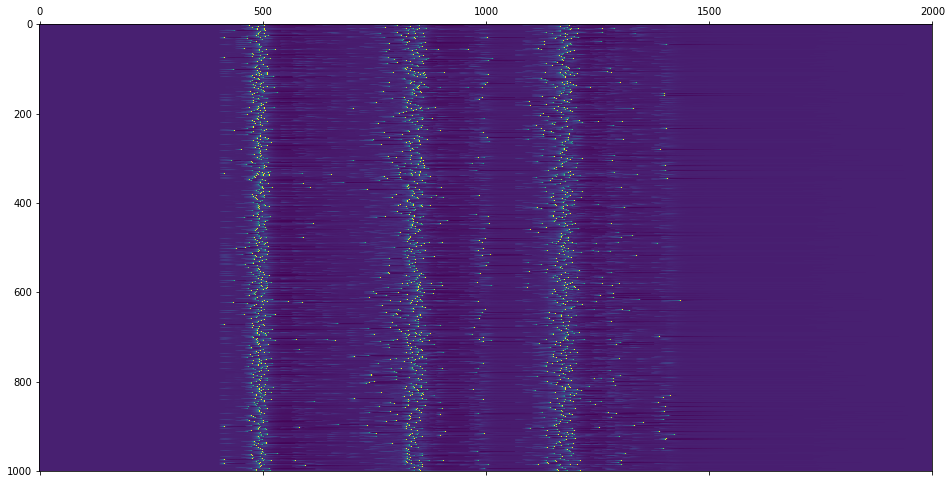

In [71]:
plt.matshow(v.T)

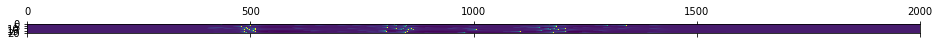

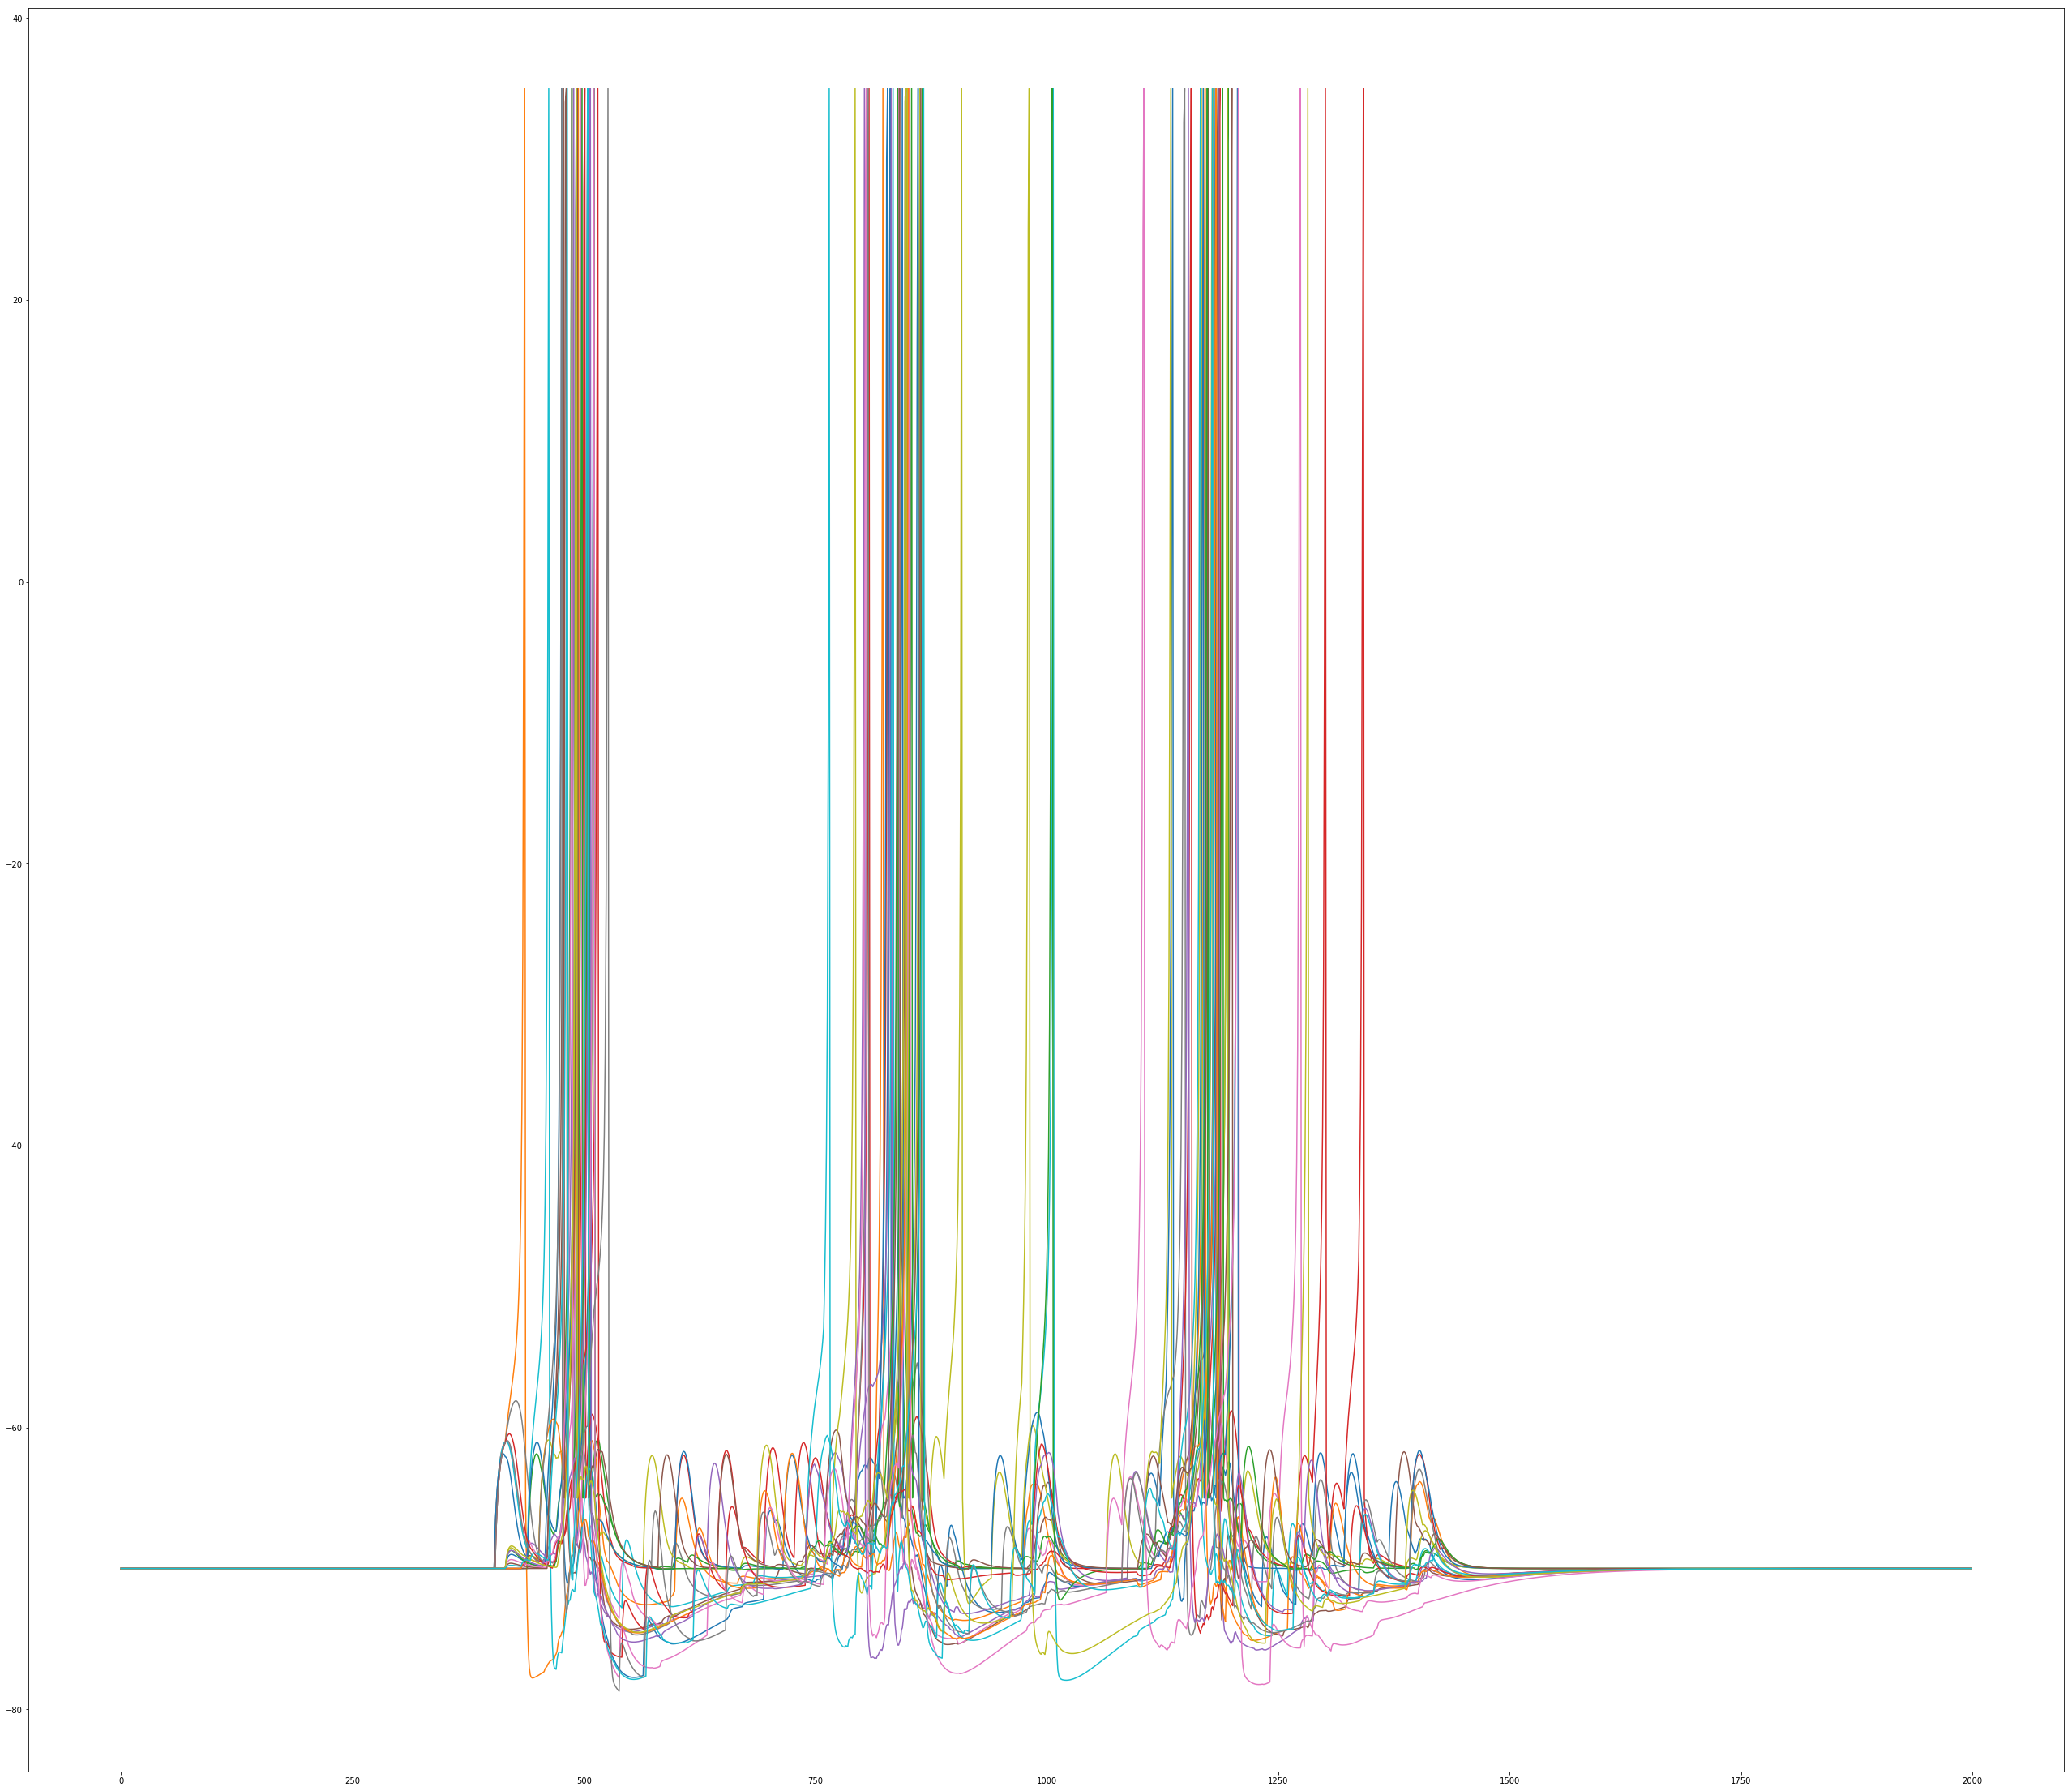

In [70]:
plt.rcParams['figure.figsize'] = [45, 40]
plt.matshow(v[:,100:120].T)
plt.show()
plt.plot(v[:,100:120])
plt.show()

In [8]:
#plt.imshow(w)
print((w))

0.005


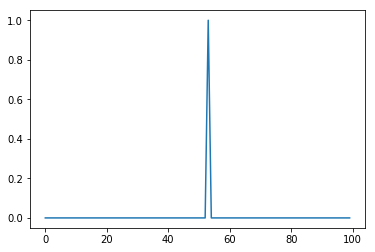

In [54]:
p = (uniform(size = n_in)) < prate
plt.plot(p)

In [41]:
uniform(size = n_in)


array([0.85618191, 0.85589668, 0.30001004, 0.27082957, 0.24827617,
       0.66110589, 0.51565232, 0.12432225, 0.80072818, 0.66724103,
       0.52314295, 0.57562056, 0.86975397, 0.8357707 , 0.70194624,
       0.08192169, 0.00880015, 0.65941943, 0.32886833, 0.84656524,
       0.37929941, 0.2420328 , 0.49434138, 0.01494479, 0.74695479,
       0.55922347, 0.53326355, 0.72754104, 0.43391763, 0.54558032,
       0.52398779, 0.77001929, 0.33125308, 0.42962241, 0.96952495,
       0.09842106, 0.37738553, 0.90049229, 0.9152687 , 0.12015536,
       0.8153231 , 0.11000238, 0.9176526 , 0.53927427, 0.57141699,
       0.46249391, 0.17296157, 0.88710232, 0.28693072, 0.80658301,
       0.79919839, 0.76325557, 0.8892027 , 0.97015682, 0.47497634,
       0.34040809, 0.28687754, 0.52995391, 0.91716349, 0.76772133,
       0.40154364, 0.76139079, 0.35540541, 0.03395116, 0.04293771,
       0.98531832, 0.21577411, 0.77851018, 0.58399981, 0.38377302,
       0.17463478, 0.19537166, 0.86498875, 0.66699525, 0.87197

In [60]:
plt.rcParams['figure.figsize'] 

[6.0, 4.0]

In [75]:
import numpy as np

class CONST_SYNAPSE():
    '''
    This synapse can be represented
    by a single non changing weight
    '''
    def __init__(self, w, I0, tau, tau_s, tau_d):
        self.w = w
        self.I0 = I0
        self.tau = tau
        self.tau_s = tau_s
        self.tau_d = tau_d
    
    def getI(self, V_train, spike_instants, delta_t):
        '''
        V_train : 1 X n_t
        spike_instants : list(arr(num_of_spikes))
        
        returns It = 1 X n_t
        '''
        n_t = V_train.shape[1]
        self.It = np.zeros(shape=(1,n_t))
        spike_instants_delayed = [si+int(self.tau_d//delta_t) for si in spike_instants]
        # print(spike_instants_delayed)
        # return
        for t in range(n_t):
            contribution = np.array(spike_instants_delayed[0])<t
            contribution_i = np.where(contribution == 1)[0]
            t_calc = np.array(spike_instants_delayed[0][contribution_i])
            if t_calc.size != 0:
                s = self.f(t*delta_t, t_calc*delta_t)
                self.It[0, t] = self.I0*self.w*s
            else:
                self.It[0, t] = 0
        return self.It
    
    def f(self, t, t_calc):
        s1 = np.exp(-(t - t_calc)/self.tau)
        s2 = np.exp(-(t - t_calc)/self.tau_s)
        s = s1-s2
        s = np.sum(s)
        return s

class PLASTIC_SYNAPSE_A():
    '''
    This synapse can be represented
    by a single weight, update rule as given in update function
    '''
    def __init__(self, w, I0, tau, tau_s, tau_d):
        self.w = w
        self.I0 = I0
        self.tau = tau
        self.tau_s = tau_s
        self.tau_d = tau_d
    
    def getI(self, V_train, spike_instants, delta_t):
        '''
        V_train : 1 X n_t
        spike_instants : list(arr(num_of_spikes))
        
        returns It = 1 X n_t
        '''
        n_t = V_train.shape[1]
        self.It = np.zeros(shape=(1,n_t))
        spike_instants_delayed = [si+int(self.tau_d//delta_t) for si in spike_instants]
        # print(spike_instants_delayed)
        # return
        for t in range(n_t):
            contribution = np.array(spike_instants_delayed[0])<t
            contribution_i = np.where(contribution == 1)[0]
            t_calc = np.array(spike_instants_delayed[0][contribution_i])
            if t_calc.size != 0:
                s = self.f(t*delta_t, t_calc*delta_t)
                self.It[0, t] = self.I0*self.w*s
            else:
                self.It[0, t] = 0
        return self.It
    
    def f(self, t, t_calc):
        s1 = np.exp(-(t - t_calc)/self.tau)
        s2 = np.exp(-(t - t_calc)/self.tau_s)
        s = s1-s2
        s = np.sum(s)
        return s

    # upd_coeff is {-1,1} according to increment/decrement rule
    def weight_update(self, gamma, delta_tk, upd_coeff):
        '''
        update the weight and will return the delta by which it updated
        '''
        s1 = np.exp(- delta_tk/self.tau)
        s2 = np.exp(- delta_tk/self.tau_s)
        if upd_coeff == -1:
            if self.w <= 1:
                self.w = 1
                return 1-self.w
            else:
                self.w = self.w + upd_coeff*self.w*gamma*(s1 - s2)
                return upd_coeff*self.w*gamma*(s1 - s2)
                # print('weights fixed to 10')
        elif upd_coeff == 1:
            if self.w >= 500:
                self.w = 500
                return 500-self.w
                # print('weights fixed to 500')
            else:
                self.w = self.w + upd_coeff*self.w*gamma*(s1 - s2)
                return upd_coeff*self.w*gamma*(s1 - s2)


class PLASTIC_SYNAPSE_B():
    '''
    This synapse will use updates
    considering the delayed time effect
    '''
    def __init__(self, w, I0, tau, tau_s, tau_d, tau_l, A_up, A_dn):
        self.w = w
        self.I0 = I0
        self.tau = tau
        self.tau_s = tau_s
        self.tau_d = tau_d
        # for weight updates 
        self.tau_l = tau_l
        self.A_up = A_up
        self.A_dn = A_dn
    
    def getI(self, V_train, spike_instants, delta_t):
        '''
        V_train : 1 X n_t
        spike_instants : list(arr(num_of_spikes))
        
        returns It = 1 X n_t
        '''
        n_t = V_train.shape[1]
        self.It = np.zeros(shape=(1,n_t))
        spike_instants_delayed = [si+int(self.tau_d//delta_t) for si in spike_instants]
        # print(spike_instants_delayed)
        # return
        for t in range(n_t):
            contribution = np.array(spike_instants_delayed[0])<t
            contribution_i = np.where(contribution == 1)[0]
            t_calc = np.array(spike_instants_delayed[0][contribution_i])
            if t_calc.size != 0:
                s = self.f(t*delta_t, t_calc*delta_t)
                self.It[0, t] = self.I0*self.w*s
            else:
                self.It[0, t] = 0
        return self.It
    
    def f(self, t, t_calc):
        s1 = np.exp(-(t - t_calc)/self.tau)
        s2 = np.exp(-(t - t_calc)/self.tau_s)
        s = s1-s2
        s = np.sum(s)
        return s

    # upd_coeff represents upstream or downstream
    def weight_update(self, delta_tk, upd_coeff):
        '''
        update the weight and will return the delta by which it updated
        '''
        # print('old w: ', self.w)
        s1 = np.exp(- delta_tk/self.tau_l)
        # print('s1: ', s1)
        if upd_coeff==1:
            # upstream
            self.w = self.w + self.w*(self.A_up*s1)
        elif upd_coeff == -1:
            self.w = self.w + self.w*(self.A_dn*s1)
        # print('new w: ', self.w)
        return self.w


#using SYNAPSE and SPIKETRAINS:
sys.path.append('/home/matei/Documents/code/Neurapse-master/Neurapse/util')
#using 
#using 

import matplotlib.pyplot as plt
from SpikeTrains import POISSON_SPIKE_TRAIN, RANDOM_SPIKE_TRAIN

n_out = 1
T = 500*(10**-3)
delta_t = 0.1*(10**-3)
n_t = int(T/delta_t)

ST = POISSON_SPIKE_TRAIN(T=T, delta_t=delta_t, lamb=10, n_out=n_out)
V, SI = ST.V_train, ST.spike_instants

w = 500
I0 = 1*(10**-12)
tau = 15*(10**-3)
tau_s = tau/4
Sy = CONST_SYNAPSE(w, I0, tau, tau_s)
I = Sy.getI(V, SI, delta_t)

plt.figure()
plt.suptitle('spike train and synaptic current')

plt.subplot(2,1,1)
plt.plot(list(range(n_t+1)), V[0,:])
plt.xlabel('time')
plt.ylabel('V')

plt.subplot(2,1,2)
plt.plot(list(range(n_t+1)), I[0,:])
plt.xlabel('time')
plt.ylabel('I')
plt.show()




ModuleNotFoundError: No module named 'SpikeTrains'